In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import re

In [3]:
df = pd.read_excel('Testing.xlsx')

In [3]:
#df

In [4]:
# Drop NaN values in Dataframe
df = df.dropna()
# Show Dataframe
df

,Mode,Message
0,Angry,Tu to chup kr ja desh
1,Angry,Bush kr de bush
2,Normal,Ya puchna ya tha k Shair kisi b traha ka send ...
3,Happy,Han g phir to any dain gy per ap k any k bgair...
4,Normal,Everyone please bs kro yr
...,...,...
525,Normal,cr ko add kro bas
526,Normal,Mujhy interest ni wrna m ye khel leni thi
528,Fear,Mauf kar dein
533,Angry,Ankhon ka msla ho to m maan b lon


In [5]:
# Change Column value --> from 'fear' to 'Fear' :)
df["Mode"].replace({"Angry ": "Angry", "fear": "Fear",}, inplace=True)

In [6]:
# Change Column value --> from 'fear' to 'Fear' :)
df["Mode"].replace({"Normal": "Positive", "Happy": "Positive", "Love": "Positive",}, inplace=True)
df["Mode"].replace({"Angry": "Negative", "Fear": "Negative", "Sad": "Negative",}, inplace=True)

In [7]:
# Get the unique values of 'Mode' column
df.Mode.unique()

array(['Negative', 'Positive'], dtype=object)

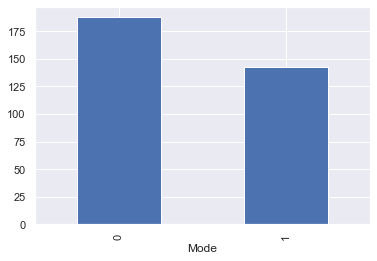

In [106]:
import matplotlib.pyplot as plt

# a simple line plot
#df.plot(kind='bar',x='Mode',y='Message')
df.groupby('Mode')['Message'].nunique().plot(kind='bar')
plt.show()

In [9]:
df['Mode'].value_counts()

Positive    188
Negative    143
Name: Mode, dtype: int64

In [10]:
df["Mode"].replace({"Positive": 0, "Negative": 1,}, inplace=True)

In [11]:
type(df['Mode'][0])

numpy.int64

In [12]:
df

,Mode,Message
0,1,Tu to chup kr ja desh
1,1,Bush kr de bush
2,0,Ya puchna ya tha k Shair kisi b traha ka send ...
3,0,Han g phir to any dain gy per ap k any k bgair...
4,0,Everyone please bs kro yr
...,...,...
525,0,cr ko add kro bas
526,0,Mujhy interest ni wrna m ye khel leni thi
528,1,Mauf kar dein
533,1,Ankhon ka msla ho to m maan b lon


In [13]:
from gensim import corpora,models,similarities
from collections import defaultdict
from sklearn.model_selection import train_test_split

c:\users\hassan raza\appdata\local\programs\python\python37\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [14]:
X = np.asarray(df['Message'])
y = np.asarray(df['Mode'])

In [15]:
type(y[0])

numpy.int64

In [16]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=True)

In [17]:
#stoplist = set('for a of the and to in'.split(' '))
stoplist = set('a of the or to me e'.split(' '))


texts = [[word for word in re.split('\W+',doc.lower()) if word not in stoplist]
         for doc in Xtrain]


# for doc in Xtrain:
#     word = doc
#     for word in re.split('\W+', doc.lower()):
#         if word in not

#print(texts)

In [18]:
print(len(texts))

231


In [19]:
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

cutOffValue = 2
processed_corpus = [[token for token in text if frequency[token] > cutOffValue] 
                    for text in texts]

In [20]:
dictionary = corpora.Dictionary(processed_corpus)
print(dictionary)

Dictionary(122 unique tokens: ['e', 'wo', 'rhi', 'thi', 'ye']...)


In [21]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

In [22]:
model = models.TfidfModel(bow_corpus)
#model = models.LsiModel(bow_corpus)
#model = models.LdaModel(bow_corpus)

In [23]:
index = similarities.SparseMatrixSimilarity(model[bow_corpus],num_features=len(dictionary))

In [96]:
y_names = ['Positive', 'Negative']

In [109]:
t = np.random.randint(len(Xtest))

#CR = "Acha kia"
#t = np.random.randint(len(CR))

query_document = re.split('\W+',Xtest[t].lower())
query_bow = dictionary.doc2bow(query_document)
sims = index[model[query_bow]]
docNumber = sorted(enumerate(sims), key=lambda x: x[1], reverse=True)[0][0]

#print('Predicted: ', ytrain[docNumber])
#print('Ground Truth:',ytest[t])

print('Predicted:',y_names[ytrain[docNumber]])
print('Ground Truth:',y_names[ytest[t]])

Predicted: Positive
Ground Truth: Positive


In [25]:
vocab = {}

In [26]:
def initializeVocabulary():
    unkToken = '<UNK>'
    #create another vocab inside vocab -> text to index
    vocab['t_2_i'] = {}
    #create another vocab inside vocab -> index to text
    vocab['i_2_t'] = {}
    # Add token in key 'unkToken' = '<UNK>'
    vocab['unkToken'] = unkToken
    # call function 'addToken()' that return token index
    idx = addToken(unkToken)
    vocab['unkTokenIdx'] = idx

In [27]:
def addToken(token):
    # if token already in vocab then just return index
    if token in vocab['t_2_i']:
        idx = vocab['t_2_i'][token]
    else:
        # create index for new tokken --> simply new index == len(vocab) /*last number*/
        idx = len(vocab['t_2_i'])
        vocab['t_2_i'][token] = idx
        vocab['i_2_t'][idx] = token
    return idx

In [28]:
def addManyTokens(tokens):
    idxes = [addToken(token) for token in tokens]
    return idxes

In [29]:
def lookUpToken(token):
    return vocab['t_2_i'].get(token,vocab['unkTokenIdx'])

In [30]:
def lookUpIndex(idx):
    if idx not in vocab['i_2_t']:
        raise KeyError("the index (%d) is not there" % idx)
    return vocab['i_2_t'][idx]

In [31]:
def vocabularyFromDataFrame(df,cutoff=2):
    initializeVocabulary()
    wordCounts = Counter()
    for r in df.review:
        for word in re.split('\W+',r):
            wordCounts[word] += 1
    for word,count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [32]:
def vocabularyFromCorpus(Corpus,cutoff=2):
    initializeVocabulary()
    wordCounts = Counter()
    for doc in Corpus:
        for word in re.split('\W+',doc):
            wordCounts[word] += 1
    for word,count in wordCounts.items():
        if count > cutoff:
            addToken(word)

In [33]:
def oneHotVector(token,N):
    oneHot = np.zeros((N,1))
    oneHot[lookUpToken(token)] = 1
    return oneHot

In [34]:
def computeFeatures(doc,N):
    isFirst = True
    for token in doc:
        oneHot = oneHotVector(token,N)
        if isFirst:
            xF = oneHot
            isFirst = False
        else:
            xF = np.hstack((xF,oneHot))
    return np.mean(xF,axis=1)[:,np.newaxis]

In [35]:
def computeFeatures_fast(doc,N):
    fv = np.zeros(N)
    numTokens = 0
    for token in doc:
        fv[lookUpToken(token)] += 1
        numTokens += 1
    return fv/numTokens

In [36]:
def corpusToFeatureMatrix(Corpus,N):
    isFirst = True
    for doc in Corpus:
        fv = computeFeatures(doc,N)
        if isFirst:
            fM = fv
            isFirst = False
        else:
            fM = np.hstack((fM,fv))
    return fM.T

In [37]:
def corpusToFeatureMatrix_fast(Corpus,N):
    fM = np.zeros((N,len(Corpus)))
    i = 0
    for doc in Corpus:
        fM[:,i] = computeFeatures_fast(doc,N)
        i+=1
    return fM.T

In [75]:
#X = np.asarray(df['Message'])
#y = np.asarray(df['Mode'])

In [38]:
X[:5], y[:5]

(array(['Tu to chup kr ja desh', 'Bush kr de bush',
        'Ya puchna ya tha k Shair kisi b traha ka send kr sakty hn na',
        'Han g phir to any dain gy per ap k any k bgair kesy hgi attendence puri',
        'Everyone please bs kro yr'], dtype=object),
 array([1, 1, 0, 0, 0], dtype=int64))

In [39]:
from sklearn.model_selection import train_test_split

In [82]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,shuffle=True)

In [83]:
vocabularyFromCorpus(Xtrain)

In [84]:
len(vocab['t_2_i'])

116

In [85]:
N = len(vocab['t_2_i'])
Xtrain_fM = corpusToFeatureMatrix_fast(Xtrain,N)
Xtest_fM = corpusToFeatureMatrix_fast(Xtest,N)

In [86]:
Xtrain_fM.shape

(231, 116)

In [87]:
Xtest_fM.shape

(100, 116)

In [110]:
#from sklearn.linear_model import LogisticRegression as clf
#from sklearn.naive_bayes import GaussianNB as clf
#from sklearn.ensemble import RandomForestClassifier as clf
#from sklearn.svm import SVC as clf
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

In [111]:
M = clf().fit(Xtrain_fM,ytrain)

c:\users\hassan raza\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [112]:
y_pred = M.predict(Xtest_fM)

In [113]:
#y_pred
Train_Score = M.score(Xtrain_fM, ytrain)
Test_Score  = M.score(Xtest_fM, ytest)
print("> :",Train_Score)
print("> :",Test_Score)

> : 0.5497835497835498
> : 0.61


Text(89.18, 0.5, 'Predicted Label')

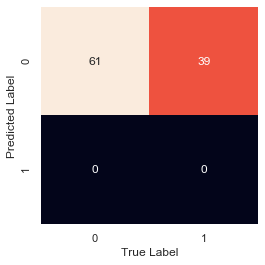

In [114]:
mat = confusion_matrix(ytest,y_pred)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=np.unique(y),yticklabels=np.unique(y))
plt.xlabel("True Label")
plt.ylabel("Predicted Label")

In [52]:
M.score(Xtrain_fM, ytrain)

0.6233766233766234

In [82]:
#clf.score(Xtest, ytest)

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.30      0.40        60
           1       0.40      0.70      0.51        40

    accuracy                           0.46       100
   macro avg       0.50      0.50      0.45       100
weighted avg       0.52      0.46      0.44       100

